In [10]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #matplotlib.pyplot is a state-based interface to matplotlib
import matplotlib.ticker as mtick #This module contains classes for configuring tick locating and formatting.

#to perform exploratory and factor analysis (EFA), with several optional rotations.
#Factor Analysis (FA) isused to search influential underlying factors or latent variables from a set of observed variables.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity  
from factor_analyzer.factor_analyzer import calculate_kmo

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## How matplotlib.ticker works ?

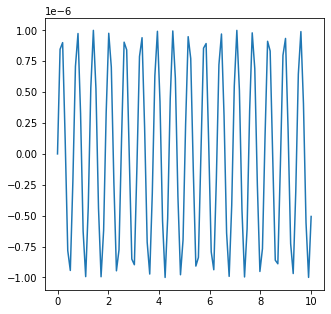

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
  
x = np.linspace(0, 10, 100) #Return evenly spaced numbers over a specified interval
y = 0.000001 * np.sin(10 * x)
  
fig = plt.figure(figsize =(5, 5))
ax = fig.add_subplot()
  
ax.plot(x, y)
plt.show()

#matplotlib.ticker.FuncFormatter class usese a user defined function for formatting. 
#This user defined function must take two values as inputs for a tick value x and a position pos.
  
#def y_fmt(x, y):
    #return '{:2.2e}'.format(x).replace('e', 'x10^')
  
 #ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))


In [12]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [13]:
"%i, %2.2f, %2.2e" % (1000, 1000, 1000)  #limit the length of precision - exponential directive

'1000, 1000.00, 1.00e+03'

## Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

**1.Bartlett’s Test**

**2.Kaiser-Meyer-Olkin Test**

Bartlett’s test of sphericity checks whether or not the observed variables **intercorrelate at all using the observed correlation matrix against the identity matrix**. If the test found statistically insignificant, you should not employ a factor analysis.

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. KMO estimates the proportion of variance among all the observed variable. Lower proportion is more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

### Returns

Definition of simple **return**: how much we gain (or lose) from the price at the time $t+1$ and the price at the time $t$. 
That is:
$$
P_{t+1} = P_{t} + R_{t,t+1}P_{t} = P_{t}(1+R_{t,t+1})
\qquad\Longrightarrow\qquad 
R_{t,t+1} := \frac{P_{t+1} - P_t}{P_{t}} = \frac{P_{t+1}}{P_t} - 1. 
$$

For example, $P_t=\$100$ and $P_{t+1}=\$104$. Hence $R_{t,t+1}=104/100-1=0.04=4\%$.

In [14]:
file_name = '/Users/r.shyaamprasadh/Downloads/data/ReturnsData_Daily.csv'
df = pd.read_csv(file_name, low_memory=False, index_col=0) 
df.index=pd.to_datetime(df.index)#Convert argument to datetime
display(df)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,BABA,SP500
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,-0.051966,-0.065617,-0.060338,-0.034869,-0.050505,-0.031161,-0.032457,-0.062376,-0.054291,...,0.006512,-0.029480,NaN,-0.034632,-0.008430,0.088754,NaN,-0.001606,NaN,-0.009549
2000-01-04,NaN,-0.031111,-0.033708,-0.023493,-0.059355,-0.042553,-0.001462,-0.051118,-0.062987,-0.074074,...,-0.037893,-0.017586,NaN,0.000000,-0.005313,-0.084310,NaN,-0.033780,NaN,-0.038345
2000-01-05,NaN,0.004587,-0.002907,-0.006173,0.010974,0.003704,-0.005857,-0.008418,-0.046828,-0.036500,...,0.042267,0.054516,NaN,0.017937,0.034188,0.014634,NaN,0.010544,NaN,0.001922
2000-01-06,NaN,0.047184,0.032070,0.014197,0.071913,0.065191,0.008837,0.044143,0.042789,0.019201,...,0.008295,0.049383,NaN,0.042584,0.002066,-0.086538,NaN,-0.033498,NaN,0.000956
2000-01-07,NaN,0.001453,0.022599,0.018373,-0.013924,-0.002309,-0.013139,0.017886,0.003799,0.031059,...,0.095978,-0.000735,NaN,0.017606,-0.018557,0.047368,NaN,0.013068,NaN,0.027090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.011060,-0.025855
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,-0.017947,0.010959
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.029033,-0.024227


In [15]:
print('Total of', len(df.columns),'stocks included in this datafile.') 
print('Stocks listed:')
for name in df.columns: print(name)

Total of 23 stocks included in this datafile.
Stocks listed:
FRC
PNC
USB
JPM
BAC
C
RY
WFC
GS
MS
HSBC
JNJ
PFE
MRK
XOM
RDS
CVS
BP
AAPL
GOOG
MSFT
BABA
SP500


In [16]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
FRC,2404.0,0.000734,0.017196,-0.150909,-0.007268,0.000689,0.008937,0.128799
PNC,5156.0,0.000568,0.023833,-0.413958,-0.008310,0.000269,0.009010,0.370909
USB,5156.0,0.000495,0.021910,-0.181653,-0.007648,0.000538,0.008207,0.228412
JPM,5156.0,0.000539,0.024902,-0.207274,-0.008974,0.000235,0.009709,0.250967
BAC,5156.0,0.000519,0.029287,-0.289694,-0.009532,0.000287,0.010111,0.352691
C,5156.0,0.000161,0.031202,-0.390244,-0.009944,0.000000,0.010086,0.578249
RY,5156.0,0.000625,0.015948,-0.150961,-0.006350,0.000656,0.007730,0.163435
WFC,5156.0,0.000457,0.024632,-0.238223,-0.007965,0.000155,0.008319,0.327645
GS,5156.0,0.000468,0.023717,-0.189596,-0.010136,0.000335,0.011087,0.264678
MS,5156.0,0.000511,0.031907,-0.258929,-0.011930,0.000230,0.012532,0.869835


In [17]:
h=df.describe()[2:3].T
h["std"].max(), h["std"].idxmax()

(0.03190721395547457, 'MS')

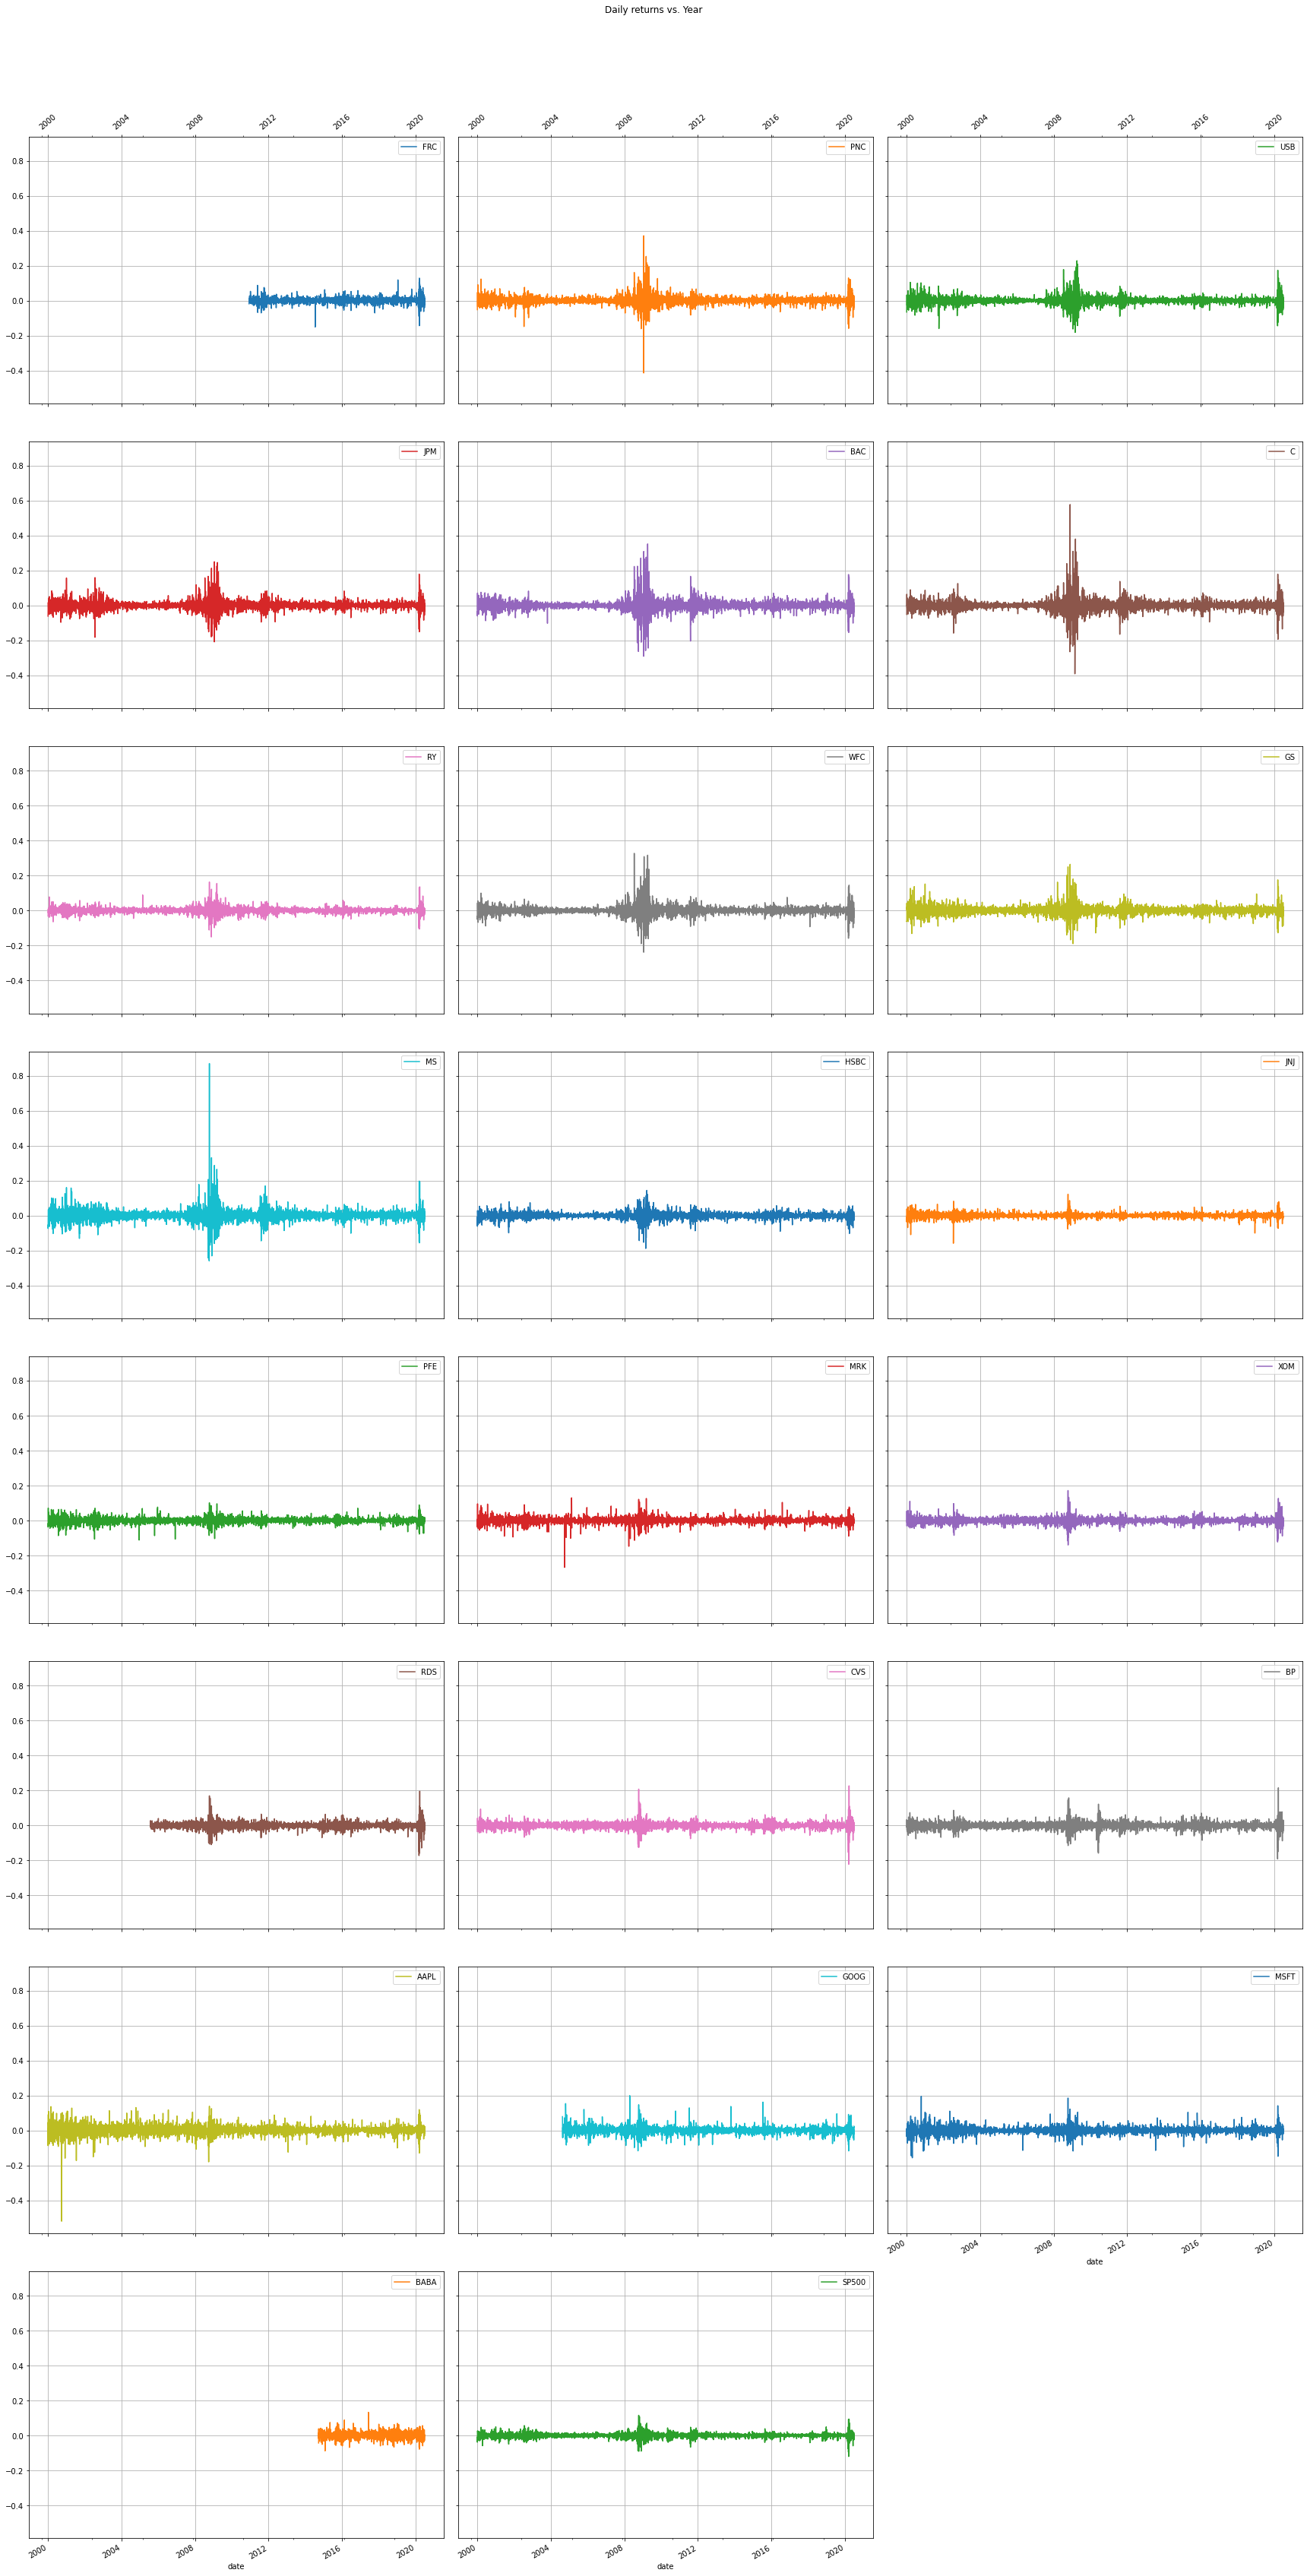

In [18]:
n = len(df.columns) 
col = 3
row = int(np.ceil(n/col))
fig_hei = row * 6 
fig_wid = col * 8 

ax = df.plot(subplots=True, layout=(row ,col), figsize=(fig_wid, fig_hei),
             sharey=True, sharex=True,
             title = 'Daily returns vs. Year',grid=True)

for i in range(col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40) #set appearance parameters for ticks, ticklabels, and gridlines.
    
fig = ax[0,0].get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

In [19]:
#address_missing_data
df = df.drop('BABA',axis = 1)
df = df.dropna()
display(df)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,SP500
date,,,,,,,,,,,,,,,,,,,,,
2010-12-10,-0.018266,-0.014618,0.023607,0.015192,0.011858,0.017600,0.006356,0.006651,0.012136,0.008985,...,0.015604,0.008971,0.002500,0.011044,0.004385,0.010516,0.002510,0.001200,0.009601,0.006002
2010-12-13,-0.000365,-0.011043,-0.010208,0.001931,-0.020313,0.008386,0.002105,-0.001652,0.005995,-0.000371,...,0.009988,0.013615,0.002494,0.006462,0.015397,0.004394,0.003463,0.004069,-0.003475,0.000048
2010-12-14,-0.003285,0.006833,-0.009167,-0.017345,-0.011164,-0.024948,-0.006494,-0.013319,-0.012686,-0.011507,...,-0.004654,0.012465,-0.002488,0.008254,0.000113,0.023256,-0.004290,0.000488,0.013764,0.000911
2010-12-15,0.005126,-0.030624,-0.005397,-0.014219,-0.008871,-0.021322,-0.005383,-0.000922,-0.012670,-0.016147,...,-0.001753,0.003010,-0.004572,-0.018344,-0.004186,-0.013051,0.000218,-0.007749,0.008327,-0.005122
2010-12-16,0.007286,-0.002391,0.011628,-0.004912,0.018714,-0.000763,-0.003286,0.007721,-0.004540,-0.007252,...,0.008197,0.004910,0.005150,0.002008,0.011930,-0.002508,0.002778,0.002389,0.004937,0.006185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.026556,-0.040379,-0.044819,-0.033391,-0.039532,-0.040415,-0.015222,-0.040764,-0.033011,-0.019628,...,-0.017699,-0.016209,-0.047109,-0.049641,-0.041557,-0.042615,-0.017652,-0.021366,-0.020158,-0.025855
2020-06-25,0.024723,0.029696,0.032004,0.034862,0.038219,0.036804,0.014863,0.047856,0.045854,0.039191,...,0.004039,0.009226,0.015056,0.023249,0.017914,0.015558,0.013276,0.005863,0.012636,0.010959
2020-06-26,-0.040303,-0.051855,-0.052300,-0.054818,-0.063511,-0.058846,-0.023433,-0.074169,-0.086480,-0.035663,...,-0.008663,-0.018023,-0.034315,-0.028917,-0.030826,-0.031489,-0.030726,-0.054514,-0.020016,-0.024227


### Return per year (or annualized return)
If we have monthly returns and a (fixed) *return per month*, we can *infer* what will be the **annualized return**, or **return per year**, i.e., the total (compound) return after $12$ months: 
$$
R_{py} = (1 + R_{pm})^{12} - 1. 
$$

To convert annual rates, such as the bond rate (assume annual risk free rate 6.5%), from an annual format to a daily format. So make your risk-free rate:
Daily risk-free rate= 1.065 **(1/365)−1=0.0001725485.

### Frequency conversion (Daily to Weekly)

First week 2010-12-12 has only one date of the returns while the week of 2020-07-05 have only two dates of the returns- remove them

In [20]:
df_week = (df+1).resample('W').prod() - 1
df_week = df_week.drop(df_week.index[[0]]) 
df_week = df_week.drop(df_week.index[[-1]])
display(df_week)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,SP500
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574,0.002830
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246,0.010339
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780,0.000692
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722,0.011020
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489,0.017099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,1.839991e-02,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,-5.760602e-02,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-6.223929e-02,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.047783


### Benchmark - Returns

In [21]:
SP500 = df_week[['SP500']]
display(SP500)

,SP500
date,
2010-12-19,0.002830
2010-12-26,0.010339
2011-01-02,0.000692
2011-01-09,0.011020
2011-01-16,0.017099
...,...
2020-05-31,0.030066
2020-06-07,0.049147
2020-06-14,-0.047783


In [22]:
data = df_week.drop('SP500',axis = 1)

### T-bill Data

In [23]:
file_name = '/Users/r.shyaamprasadh/Downloads/data/WTB3MS.csv' 
df = pd.read_csv(file_name)
df

,DATE,WTB3MS
0,1/8/1954,1.30
1,1/15/1954,1.28
2,1/22/1954,1.11
3,1/29/1954,1.01
4,2/5/1954,0.99
...,...,...
3464,5/29/2020,0.15
3465,6/5/2020,0.15
3466,6/12/2020,0.17
3467,6/19/2020,0.17


In [24]:
df['DATE']=pd.to_datetime(df['DATE'])
df['WTB3MS'] = pd.to_numeric(df['WTB3MS'], errors='coerce')

In [25]:
RET_data=pd.DataFrame(columns=['RET'], index=df.DATE)
RET_data['RET'] = (df['WTB3MS'].values/100 + 1) ** (1/52) - 1 #edit the unit of the return data

In [26]:
RET_data_weekly = (RET_data['RET']+1).resample('W').prod() - 1 
TBill = pd.DataFrame(columns=['T-Bill'], index=RET_data_weekly.index)
TBill['T-Bill'] = RET_data_weekly #convert the data to the same weekly frequency as the stock data

In [27]:
TBill

,T-Bill
DATE,
1954-01-10,0.000248
1954-01-17,0.000245
1954-01-24,0.000212
1954-01-31,0.000193
1954-02-07,0.000189
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


**Match the start and end date of T-bill data with the stock returns**

In [28]:
TBill.index

DatetimeIndex(['1954-01-10', '1954-01-17', '1954-01-24', '1954-01-31',
               '1954-02-07', '1954-02-14', '1954-02-21', '1954-02-28',
               '1954-03-07', '1954-03-14',
               ...
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28'],
              dtype='datetime64[ns]', name='DATE', length=3469, freq='W-SUN')

In [29]:
df_week.index

DatetimeIndex(['2010-12-19', '2010-12-26', '2011-01-02', '2011-01-09',
               '2011-01-16', '2011-01-23', '2011-01-30', '2011-02-06',
               '2011-02-13', '2011-02-20',
               ...
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28'],
              dtype='datetime64[ns]', name='date', length=498, freq='W-SUN')

In [30]:
df_week.index[[0]]

DatetimeIndex(['2010-12-19'], dtype='datetime64[ns]', name='date', freq=None)

In [31]:
df_week.index[[0]][0]

Timestamp('2010-12-19 00:00:00')

In [32]:
ind = (TBill.index >= df_week.index[[0]][0])*(TBill.index <= df_week.index[[-1]][0])

In [33]:
ind

array([False, False, False, ...,  True,  True,  True])

In [34]:
TBill = TBill[ind]

In [35]:
display(TBill,df_week)

,T-Bill
DATE,
2010-12-19,0.000027
2010-12-26,0.000027
2011-01-02,0.000027
2011-01-09,0.000027
2011-01-16,0.000029
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT,SP500
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574,0.002830
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246,0.010339
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780,0.000692
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722,0.011020
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489,0.017099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,1.839991e-02,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417,0.030066
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,-5.760602e-02,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555,0.049147
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-6.223929e-02,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886,-0.047783


In [36]:
start_date = '2010-12-19'
end_date   = '2020-06-28'

In [37]:
ind = (data.index >= start_date)*(data.index <= end_date)

data = data[ind]
display(data)

SP500 = SP500[ind]
display(SP500)

TBill = TBill[ind]
display(TBill)

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,JNJ,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,0.010177,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,-0.004636,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-0.006426,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,0.012127,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-0.000798,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,0.111717,0.090144,0.079866,0.087626,0.064430,0.086395,0.101580,0.095159,0.098984,0.101420,...,0.030339,1.839991e-02,0.056960,0.019506,-0.008995,0.015730,0.006964,-0.002980,0.014351,-0.001417
2020-06-07,0.110382,0.122675,0.191507,0.143049,0.173256,0.228554,0.109022,0.196449,0.109063,0.120588,...,-0.009747,-5.760602e-02,0.019078,0.167364,0.182160,0.099345,0.197494,0.042649,0.004535,0.021555
2020-06-14,-0.111648,-0.134890,-0.114703,-0.102130,-0.118463,-0.112299,-0.064237,-0.116829,-0.074064,-0.065617,...,-0.034964,-6.223929e-02,-0.065038,-0.111341,-0.087901,-0.083523,-0.106819,0.022022,-0.018820,0.002886


,SP500
date,
2010-12-19,0.002830
2010-12-26,0.010339
2011-01-02,0.000692
2011-01-09,0.011020
2011-01-16,0.017099
...,...
2020-05-31,0.030066
2020-06-07,0.049147
2020-06-14,-0.047783


,T-Bill
DATE,
2010-12-19,0.000027
2010-12-26,0.000027
2011-01-02,0.000027
2011-01-09,0.000027
2011-01-16,0.000029
...,...
2020-05-31,0.000029
2020-06-07,0.000029
2020-06-14,0.000033


# Estimate Annual Returns, Volatility of Return, Sharpe Ratio, Max Drawdown

### Volatility (or risk)

The volatility of an asset is simply the standard deviation of the returns of the asset:
$$
\sigma := \sqrt{  \frac{1}{N-1} \sum_{t} (R_t - \mu)^2  },
$$
where $R_t$ is our series of returns at time $t$ and $\mu$ is the sample mean of the returns, i.e., $\mu := \frac{1}{N}\sum_{t}R_t$, 
with $N$ denoting the number of returns.

### Adjusting the volatility

Suppose that we have **monthly** returns and we compute the volatily of our asset, that is, we compute the **monthly volatility**. 
*What if we want to know the volatility over the year?* It is clear that we cannot compare the volatility obtained from **monthly** 
data with the volatility obtained from **daily** data. 

The way to adjust this is the following:
$$
\sigma_{ann} = \sigma_{p} \sqrt{p},
$$
where $\sigma_{ann}$ is the **annualized volatility**, or volatility per year, whereas $p$ stands for the period considered 
and $\sigma_p$ the corresponding computed volatility. 

**Examples:**

1) In case of monthly returns with volatility $\sigma_m$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_m\sqrt{12}$ as the year consists of $12$ months.

2) In case of weekly returns with volatility $\sigma_w$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_w\sqrt{52}$ as the year consists of $52$ weeks.

3) In case of daily returns with volatility $\sigma_d$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_d\sqrt{252}$ as the year consists of approximately $252$ trading days.

### Sharpe_ratio : Excess Return to Risk 

 Higher ROR for stock A just says that **we get a better return (per unit of risk) is we invest in this stock**, or, in other words, it is better to invest in it rather than invest in stock B nonetheless the total return from the two stock is about the same.

The **sharpe ratio** is obtained from an adjustment to the risk on return ratio. 
Basically, the adjustment is to subtract from the return somenthing called **risk free rate** which is the return from some asset considered risk-free, i.e., with a very small volatility (e.g., **US Treasury Bill**, 30 days or less). 

Hence, we considers the **excess of the asset return over the benchmark (risk-free) return**:

$$
\text{SHARPE RATIO} := \frac{\text{RETURN} - \text{RISK FREE RATE}}{\text{RISK}}
= \frac{\text{EXCESS RETURN}}{\text{RISK}}. 
$$

### Estimate Drawdown

The Drawdown is defined as the **worst return** we would experience if we buy at very highest peak and sell at very lowest point. 
It measures **potential losses**, and therefore it is a **downside risk measure**.

An Analysis of the Maximum Drawdown Risk Measure : http://www.cs.rpi.edu/~magdon/ps/journal/drawdown_RISK04.pdf

## How to compute Drawdown ?

In order to compute the drawdon of the two indices we do the following steps
1. Compute the **wealth index**, i.e., the value of the portfolio as it compounds over times. That is, given the series of returns, it is the series of compound returns at each time frame (using *cumprod()* method) 
2. Compute previous peaks
3. Compute the **drawdown**, i.e., the wealth values as a percentage of previous peaks

#### Drawdown example 

In [38]:
SP500.head()

,SP500
date,
2010-12-19,0.002830
2010-12-26,0.010339
2011-01-02,0.000692
2011-01-09,0.011020
2011-01-16,0.017099


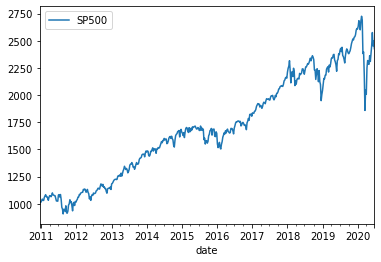

In [39]:
Wealth_index= 1000*(1+SP500).cumprod()
Wealth_index.plot()

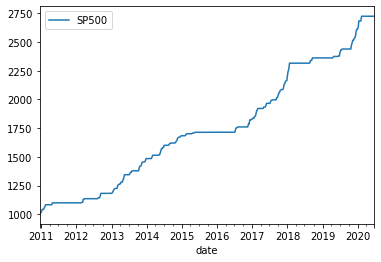

In [40]:
Previous_peaks=Wealth_index.cummax()
Previous_peaks.plot()


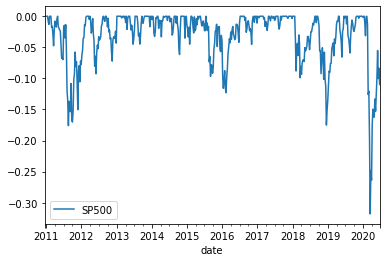

In [41]:
draw_down=(Wealth_index-Previous_peaks)/ Previous_peaks
draw_down.plot.line()

In [42]:
Freq = 52 #given weekly returns data 

def ann_ret(x):
    return (x+1)**Freq-1

def ann_std(x):
    return x*np.sqrt(Freq)

def ann_geo_mean(x): #average rate of return of a set of values calculated using the products of the terms.
    n = len(x)
    return np.exp(np.sum(np.log(1+x)) * Freq / n) - 1

def ann_sr(x, rf):    
    n = len(x)
    ret_expected = np.sum(x-rf)/n
    ret_avg = np.sum(x)/n
    std_dev = np.sqrt( np.sum( (x - ret_avg)**2 ) / n )
    annu_ret_expected = (ret_expected+1)**Freq-1
    annu_std_dev = std_dev * np.sqrt(Freq)
    return annu_ret_expected/annu_std_dev

def mdd(x):
    wealth = (x+1).cumprod() 
    cummax = wealth.cummax() 
    drawdown = wealth/cummax - 1  
    return drawdown.min()

In [43]:
n_dec = 2
SumStat = pd.DataFrame(index = data.columns)
SumStat['Geo Mean(Annu,%)'] = np.round( data.apply(ann_geo_mean)*100, n_dec)
SumStat['Volatility(Annu,%)'] = np.round( ann_std(data.std())*100 , n_dec)
SumStat['Sharpe Ratio (Annu)'] = np.round( data.apply(ann_sr, rf=TBill['T-Bill']) , n_dec)
SumStat['Max Drawdown(%)'] = np.round(data.apply(mdd)*100, n_dec)
display(SumStat)

,"Geo Mean(Annu,%)","Volatility(Annu,%)",Sharpe Ratio (Annu),Max Drawdown(%)
FRC,15.80,25.96,0.73,-33.06
PNC,8.10,26.09,0.43,-46.63
USB,5.80,24.09,0.34,-48.13
JPM,11.67,26.71,0.56,-39.64
BAC,7.69,33.47,0.39,-66.00
C,1.44,34.43,0.20,-53.90
RY,6.68,19.96,0.41,-35.26
WFC,1.12,26.95,0.16,-60.90
GS,2.72,29.02,0.22,-48.89
MS,7.82,33.69,0.40,-58.41


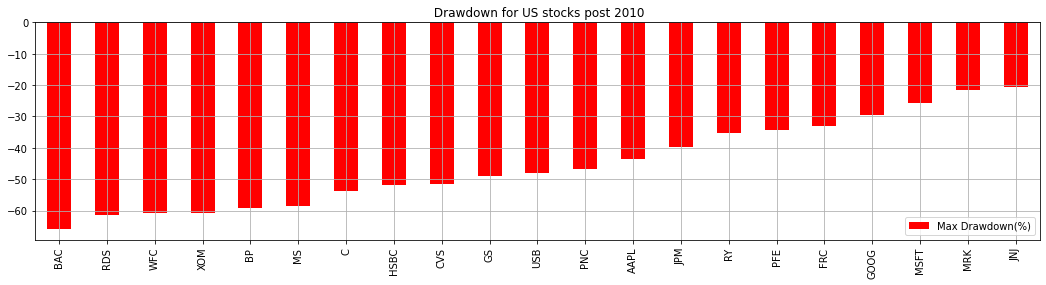

In [44]:
SumStat["Max Drawdown(%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title=" Drawdown for US stocks post 2010",color='r')


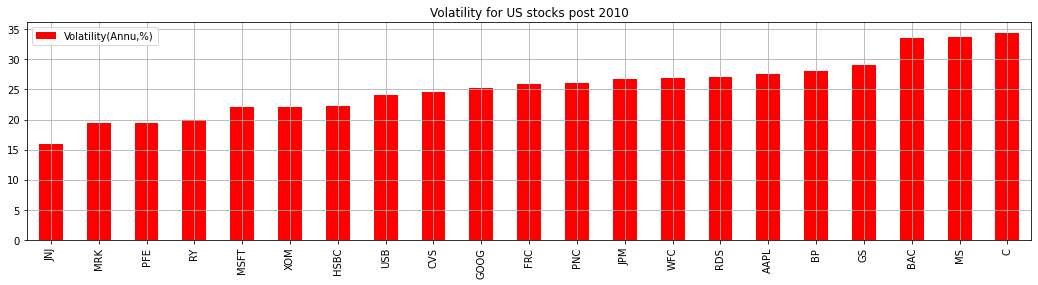

In [45]:
SumStat["Volatility(Annu,%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title="Volatility for US stocks post 2010",color='r')

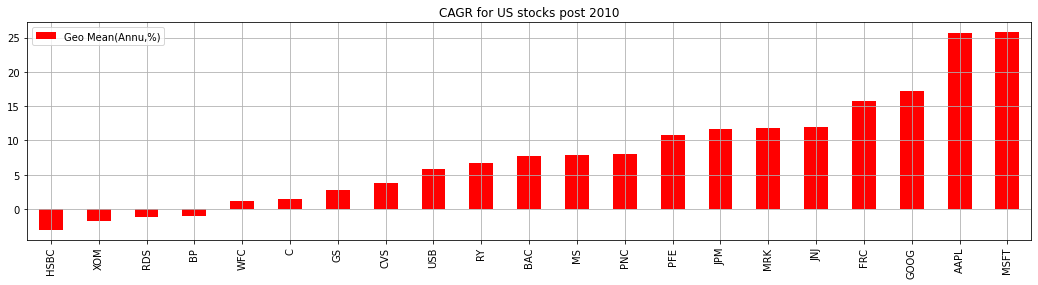

In [46]:
SumStat["Geo Mean(Annu,%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title="CAGR for US stocks post 2010",color='r')

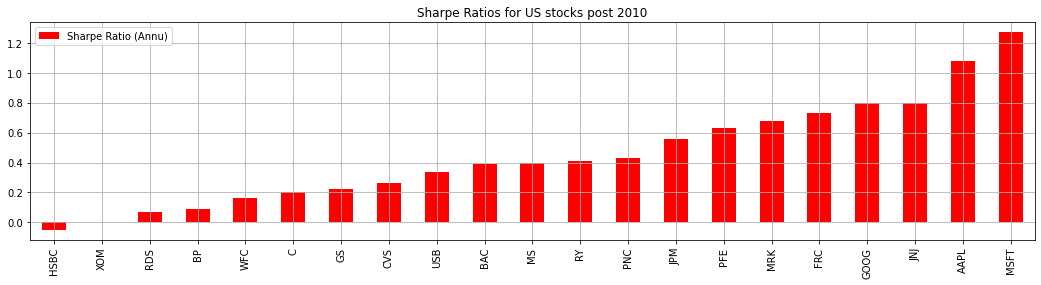

In [47]:
SumStat["Sharpe Ratio (Annu)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title="Sharpe Ratios for US stocks post 2010",color='r')

### Estimate Alpha and Beta in CAPM

Why we use reshape (-1,1)?

In [48]:
df_hurricanes = pd.DataFrame(dict(
    name=['Zeta', 'Andrew', 'Agnes'], 
    year=[2020, 1992, 1972 ]
))
df_hurricanes

,name,year
0,Zeta,2020
1,Andrew,1992
2,Agnes,1972


In [49]:
years_series = df_hurricanes['year']
years_series.shape

(3,)

In [50]:
years_series = df_hurricanes[['year']]
years_series.shape

(3, 1)

Things get tricky when an object expects data to arrive in a certain shape. For example, most scikit-learn transformers and estimators expect to be fed their predictive X data in two-dimensional form. The target variable, y is expected to be one-dimensional.

In [51]:
#x = df_hurricanes['year']
x = df_hurricanes[['year']]
y = df_hurricanes['name']

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
arr = np.array([1, 2, 3, 4, 5])
arr.shape

(5,)

In [54]:
hard_coded_arr_shape = arr.reshape(-1, 1)
hard_coded_arr_shape

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [55]:
hard_coded_arr_shape.shape

(5, 1)

In [56]:
def LR(X,y):
    reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
    return reg.coef_,reg.intercept_

In [57]:
data.head()

,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,JNJ,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT
date,,,,,,,,,,,,,,,,,,,,,
2010-12-19,0.023713,-0.035768,-0.009452,-0.042481,-0.017969,-0.014676,-0.025839,-0.010241,-0.026297,-0.026345,...,0.010177,5.874812e-04,0.024285,-0.000138,-0.010153,0.016776,0.000231,0.000156,-0.002381,0.020574
2010-12-26,0.037063,0.027521,0.031297,0.060752,0.038983,-0.004256,0.010413,0.034380,0.021703,0.044588,...,-0.004636,3.405802e-02,-0.005208,0.014271,0.020826,0.024748,0.017341,0.009327,0.022733,0.014246
2011-01-02,0.000687,0.010149,-0.000004,0.008080,0.021440,0.010684,0.018083,0.000001,0.003342,-0.007296,...,-0.006426,-5.676861e-03,-0.006889,-0.001093,0.016748,0.006285,0.003864,-0.003215,-0.016981,-0.013780
2011-01-09,0.048763,0.020092,-0.032628,0.029924,0.068216,0.044398,0.000573,0.016457,0.015045,0.036384,...,0.012127,4.740118e-02,0.036347,0.033781,-0.015423,-0.000658,0.043242,0.042038,0.037830,0.024722
2011-01-16,0.026523,0.038476,0.049062,0.029103,0.070175,0.038461,0.038366,0.039682,0.025251,0.027659,...,-0.000798,-7.686505e-07,-0.083533,0.029767,0.036045,0.017984,0.068794,0.036771,0.012555,-0.010489


In [58]:
ex_ret = data.sub(TBill['T-Bill'], axis=0)
mkt_ex_ret = SP500.sub(TBill['T-Bill'], axis=0)

In [59]:
n = len(ex_ret.columns)
beta = np.zeros(n)
alpha = np.zeros(n)

In [60]:
for i in range(n):
    beta[i],alpha[i] = LR(mkt_ex_ret.values,ex_ret[ex_ret.columns[i]].values)

In [61]:
AlphaBeta = pd.DataFrame(index = data.columns)
AlphaBeta['Alpha(Annu,%)']  = np.round( ann_ret(alpha)*100, n_dec)
AlphaBeta['Beta']   = np.round(beta ,3)
display(AlphaBeta)

,"Alpha(Annu,%)",Beta
FRC,7.49,1.025
PNC,-1.79,1.245
USB,-3.56,1.159
JPM,1.26,1.280
BAC,-2.55,1.501
C,-9.96,1.730
RY,-1.34,0.924
WFC,-7.87,1.235
GS,-7.37,1.397
MS,-3.30,1.602


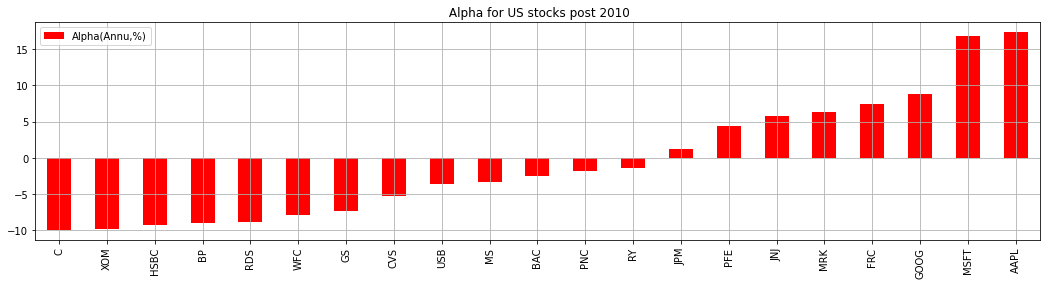

In [62]:
AlphaBeta["Alpha(Annu,%)"].sort_values().plot.bar(grid=True,legend=True,figsize=(18,4),title=" Alpha for US stocks post 2010",color='r')

In [63]:
AlphaBeta["Alpha(Annu,%)"].max(),AlphaBeta["Alpha(Annu,%)"].idxmax()

(17.34, 'AAPL')

In [64]:
SumStat["Sharpe Ratio (Annu)"].idxmax(),SumStat["Sharpe Ratio (Annu)"].max()

('MSFT', 1.27)

### Which one to buy APPLE or MICROSOFT ?  - Assignment 2

### Covariance Matrix of Returns

In [65]:
data_cov_mat = data.cov()
data_cov_mat_annu = data_cov_mat * Freq 
print("The Annualized Covariance matrix (for the weekly returns) is: ")
display(data_cov_mat_annu)

The Annualized Covariance matrix (for the weekly returns) is: 


,FRC,PNC,USB,JPM,BAC,C,RY,WFC,GS,MS,...,JNJ,PFE,MRK,XOM,RDS,CVS,BP,AAPL,GOOG,MSFT
FRC,0.067394,0.048483,0.041604,0.044259,0.056190,0.056529,0.025321,0.043375,0.047998,0.052201,...,0.016048,0.018337,0.015403,0.026568,0.025501,0.030534,0.028785,0.024591,0.024426,0.020148
PNC,0.048483,0.068073,0.054789,0.057737,0.070704,0.072872,0.031488,0.058332,0.058108,0.066115,...,0.016859,0.018880,0.017163,0.034044,0.031634,0.036236,0.035160,0.027142,0.029431,0.026041
USB,0.041604,0.054789,0.058019,0.052261,0.062535,0.066834,0.030775,0.056775,0.051910,0.057925,...,0.015190,0.017428,0.016092,0.034508,0.034279,0.034912,0.037040,0.026079,0.028350,0.023695
JPM,0.044259,0.057737,0.052261,0.071323,0.077028,0.080352,0.036494,0.058268,0.066143,0.075419,...,0.018416,0.021772,0.020279,0.036391,0.036036,0.039826,0.039332,0.026889,0.029785,0.026996
BAC,0.056190,0.070704,0.062535,0.077028,0.112034,0.100327,0.040154,0.070144,0.079817,0.092802,...,0.019271,0.023409,0.020823,0.039844,0.038170,0.043126,0.043702,0.035045,0.035470,0.032068
C,0.056529,0.072872,0.066834,0.080352,0.100327,0.118556,0.047438,0.073440,0.083850,0.096354,...,0.023472,0.025944,0.023583,0.047695,0.049569,0.052551,0.055695,0.040685,0.041170,0.036210
RY,0.025321,0.031488,0.030775,0.036494,0.040154,0.047438,0.039836,0.033824,0.037890,0.043829,...,0.014066,0.016921,0.014051,0.028034,0.034236,0.032854,0.035539,0.022394,0.020764,0.018586
WFC,0.043375,0.058332,0.056775,0.058268,0.070144,0.073440,0.033824,0.072635,0.058434,0.065217,...,0.015980,0.020202,0.018656,0.037094,0.037283,0.036993,0.039870,0.025704,0.029264,0.023911
GS,0.047998,0.058108,0.051910,0.066143,0.079817,0.083850,0.037890,0.058434,0.084221,0.084882,...,0.019434,0.021991,0.019246,0.038091,0.037906,0.042005,0.042436,0.031803,0.030605,0.028498
MS,0.052201,0.066115,0.057925,0.075419,0.092802,0.096354,0.043829,0.065217,0.084882,0.113531,...,0.021808,0.026725,0.022088,0.044100,0.045940,0.048876,0.049878,0.033037,0.036736,0.034966


### Factorability check

In [66]:
chi_square_value,p_value = calculate_bartlett_sphericity(data)
print("In this Bartlett ’s test, the p-value is:", p_value)
if (p_value < 0.05):
    print("The test was statistically significant; the observed correlation matrix is not an identity matrix.")

In this Bartlett ’s test, the p-value is: 0.0
The test was statistically significant; the observed correlation matrix is not an identity matrix.


In [67]:
kmo_all,kmo_model = calculate_kmo(data)
print("In this KOM test, the overall KMO is:", kmo_model)
if (kmo_model > 0.6):
    print("Value of KMO is greater than 0.6; you can adequately perform factor analysis with the data.")

In this KOM test, the overall KMO is: 0.9584761419599391
Value of KMO is greater than 0.6; you can adequately perform factor analysis with the data.


## Estimating parameters of Markowitz Model

In [68]:
start_date_train = '2010-12-19'
end_date_train   = '2020-06-28'

In [69]:
ind = (data.index >= start_date_train)*(data.index <= end_date_train)
data_train = data[ind].copy()
SP500_train = SP500[ind].copy()
TBill_train = TBill[ind].copy()

In [70]:
data_train.shape,SP500_train.shape,TBill_train.shape

((498, 21), (498, 1), (498, 1))

In [71]:
data_train_mean = data_train.mean()
data_train_cov_mat = data_train.cov()

### Miniature version: 2-Asset portfolio

In [72]:
no_of_weights=20
weights=[np.array([w,1-w]) for w in np.linspace(0,1,no_of_weights)]    # list comprehension
for i in range(len(weights)): 
    print (weights[i])

[0. 1.]
[0.05263158 0.94736842]
[0.10526316 0.89473684]
[0.15789474 0.84210526]
[0.21052632 0.78947368]
[0.26315789 0.73684211]
[0.31578947 0.68421053]
[0.36842105 0.63157895]
[0.42105263 0.57894737]
[0.47368421 0.52631579]
[0.52631579 0.47368421]
[0.57894737 0.42105263]
[0.63157895 0.36842105]
[0.68421053 0.31578947]
[0.73684211 0.26315789]
[0.78947368 0.21052632]
[0.84210526 0.15789474]
[0.89473684 0.10526316]
[0.94736842 0.05263158]
[1. 0.]


In [73]:
def portfolio_return(weights, returns):
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5

columns = ["MSFT", "AAPL"]
rets = [portfolio_return(w1, data_train_mean[columns]) for w1 in weights]
vols = [portfolio_vol(w1, data_train_cov_mat.loc[columns,columns]) for w1 in weights]

In [74]:
ef = pd.DataFrame({"Returns": rets, "Risk": vols})
ef

,Returns,Risk
0,0.005133,0.038149
1,0.005120,0.036856
2,0.005107,0.035624
3,0.005094,0.034461
4,0.005081,0.033374
5,0.005068,0.032369
6,0.005056,0.031455
7,0.005043,0.030641
8,0.005030,0.029933
9,0.005017,0.029341


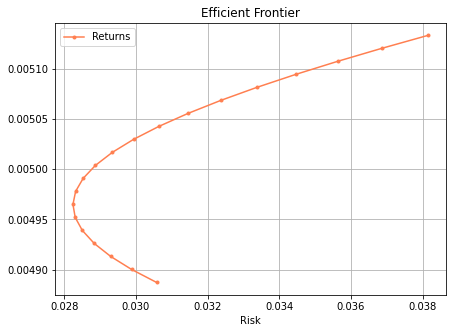

In [75]:
import matplotlib.pyplot as plt
efficient_frontier = pd.DataFrame({"Returns": rets, "Risk": vols})
efficient_frontier.plot.line(x="Risk",y="Returns",grid='True',figsize=(7,5),title="Efficient Frontier",style=".-",color="coral")

## Simulate Random Portfolios

This simulation generates random weights using the Dirichlet distribution, and computes the mean return,volatility for each sample portfolio using the historical stock return data

In [76]:
from numpy.random import random, uniform, normal, dirichlet, choice
from numpy.linalg import inv
import seaborn as sns

In [77]:
rf_rate = TBill.mean()
mean_returns=data_train_mean
cov_matrix=data_train_cov_mat 
stocks = data_train.columns
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
n_obs, n_assets = data_train.shape
monthly_returns=data_train
NUM_PF=100000
n_assets, n_obs

(21, 498)

In [78]:
alpha = np.full(shape=n_assets, fill_value=.01)
weights = dirichlet(alpha=alpha, size=NUM_PF)
weights *= choice([-1, 1], size=weights.shape)
weights.shape

(100000, 21)

In [79]:

plt.style.use('fivethirtyeight')
np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

In [80]:
cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)

In [81]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.025)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ monthly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         }), weights

In [82]:
periods_per_year = round(data_train.resample('A').size().mean())
periods_per_year

45.0

In [83]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

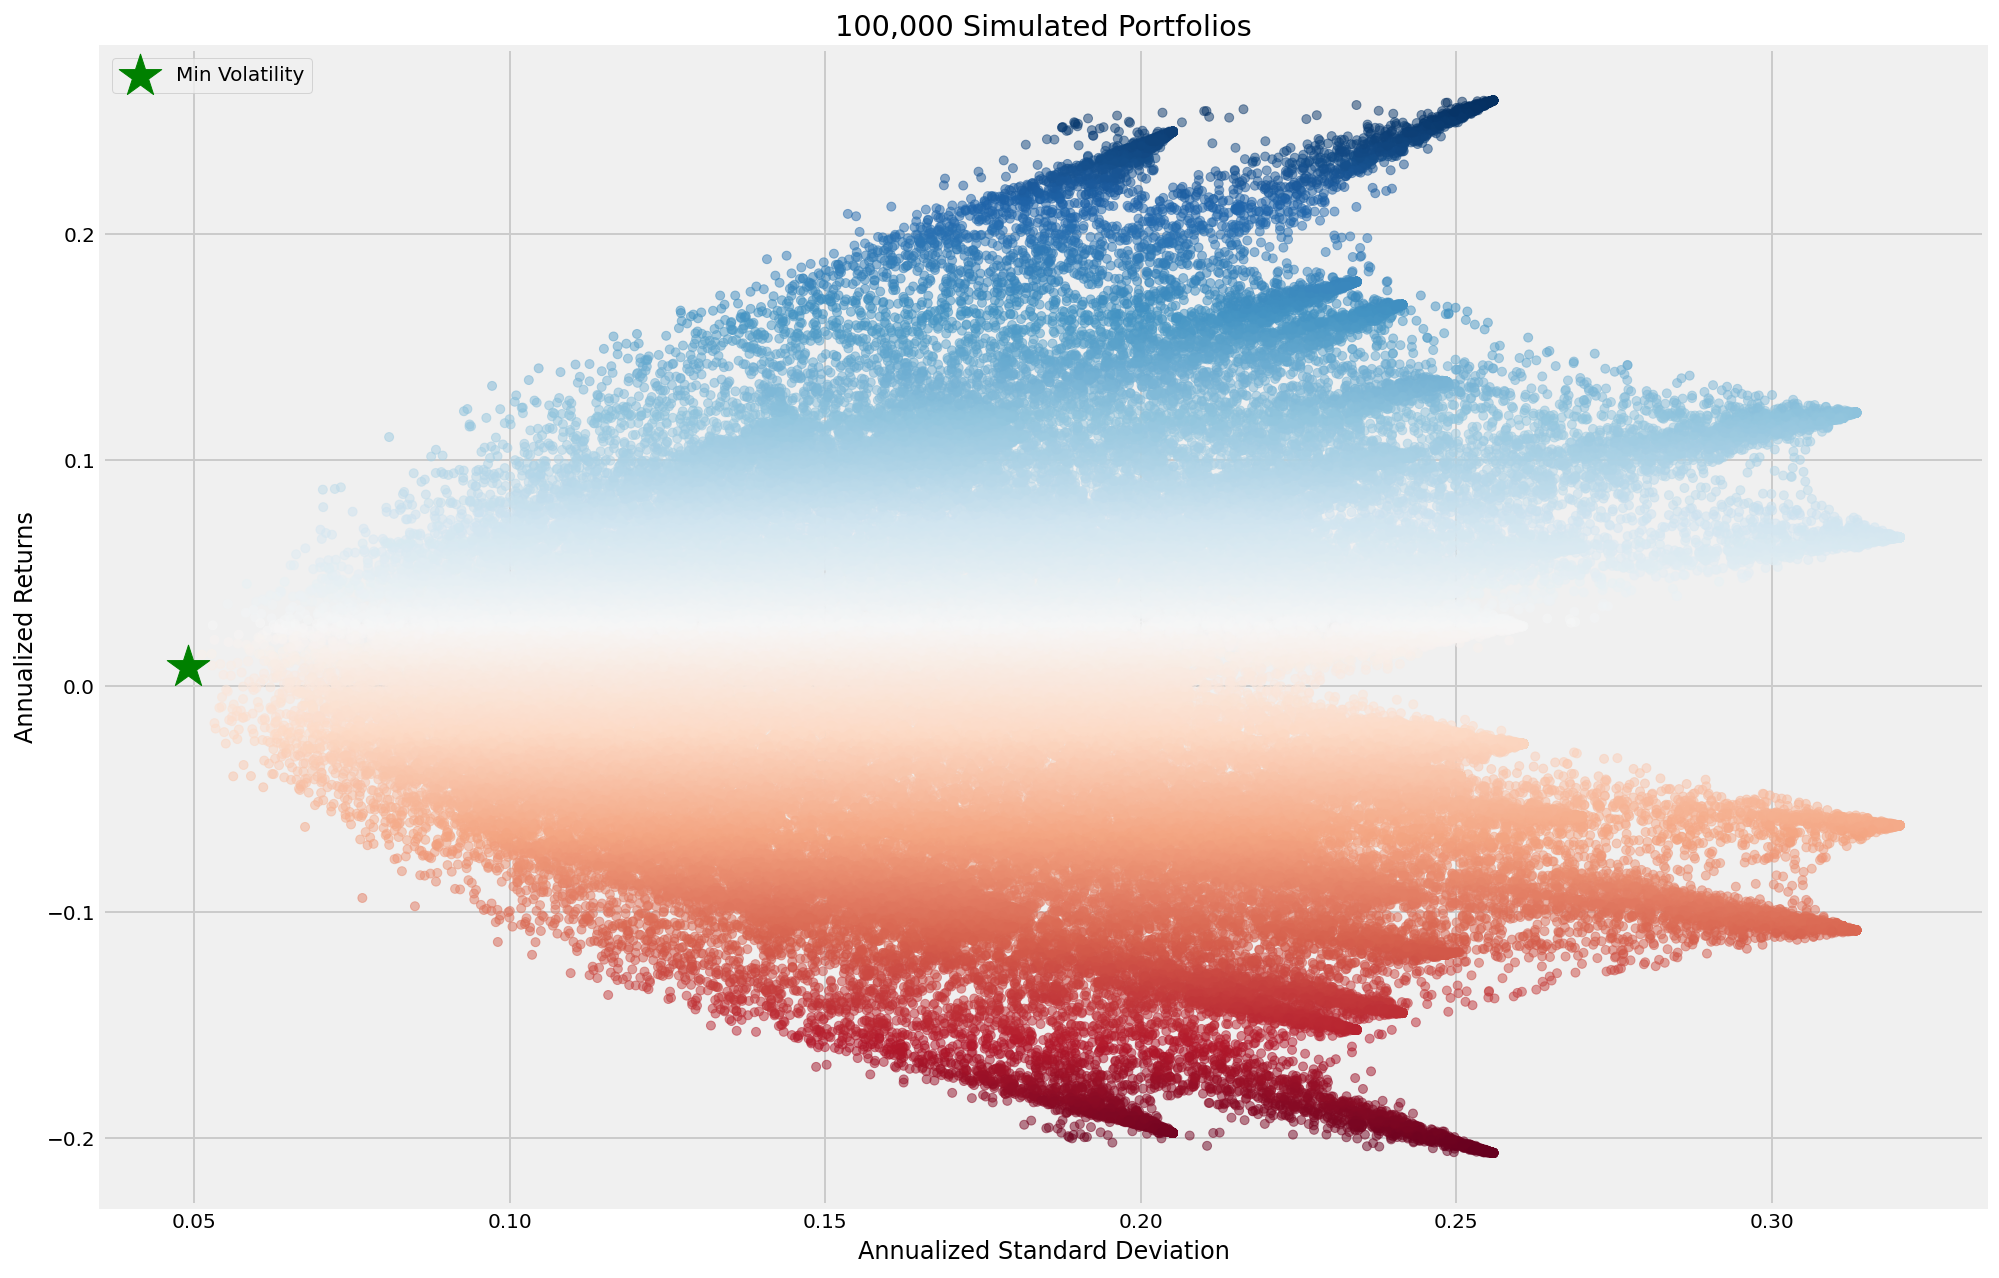

In [84]:
ax = simul_perf.plot.scatter(x=0, y=1,c=1,
                             cmap='RdBu',
                             alpha=0.5, figsize=(14, 9), colorbar=False,
                             title=f'{NUM_PF:,d} Simulated Portfolios')
min_vol_idx = simul_perf.iloc[:, 0].idxmin()
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

### N-asset Markowitz optimization Problem

- Minimize the portfolio variance given:
    - the budget constraint, 
    - non-negativity contraint (all weight must be positive, i.e. no shorting),
    - return constraint (the expected return of the portfolio should be greater than or equal to a given number r-bar).

Objective:  $$ \text{min } w^T Q w$$

Constraints:

1) budget constraint: $$ \textbf{1}^T w = 1 $$
2) nonnegative constraint: $$w \geq 0$$
3) return constraint: $$\mu^T w \geq \bar{r}$$

where:
- $w$ = vector for weights (amount of investment)
- $Q$ = covariance matrix
- $\textbf{1}$ = vector of 1's
- $\mu$ is the vector for expected return 
- $\bar{r}$ is the target return
 

In [85]:
l = ["FRC", "PNC", "USB", "JPM", "BAC", "C", "RY", "WFC", "GS", "MS", "HSBC",
       "JNJ", "PFE", "MRK", "XOM", "RDS", "CVS", "BP", "AAPL", "GOOG", "MSFT"]

### Efficient Frontier 

In [86]:
data_train_mean[l]

FRC     0.003
PNC     0.002
USB     0.002
JPM     0.003
BAC     0.002
C       0.001
RY      0.002
WFC     0.001
GS      0.001
MS      0.003
HSBC   -0.000
JNJ     0.002
PFE     0.002
MRK     0.003
XOM     0.000
RDS     0.000
CVS     0.001
BP      0.001
AAPL    0.005
GOOG    0.004
MSFT    0.005
dtype: float64

In [87]:
data_train_mean[l].max(),data_train_mean[l].idxmax()

(0.005133228258947247, 'AAPL')

In [88]:
data_train_mean[l].min(),data_train_mean[l].idxmin()

(-0.0001166650517559413, 'HSBC')

In [89]:
from scipy.optimize import minimize

def min_vol(target_return, expected_return, covariance):
    n = expected_return.shape[0]
    initial_weights= np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1    #budget constraints
    }
    ##return constraint
    return_this_target = {'type': 'eq',
                        'args': (expected_return,),
                        'fun': lambda weights, expected_return: target_return - portfolio_return(weights,expected_return)
    }
    weights = minimize(portfolio_vol, initial_weights,
                       args=(covariance,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_this_target),
                       bounds=bounds)
    return weights.x

In [90]:
def optimal_weights(n_points, expected_return, covariance):
    target_rs = np.linspace(expected_return.min(), expected_return.max(), n_points)
    weights = [min_vol(target_return, expected_return, covariance) for target_return in target_rs]
    print(pd.DataFrame(weights))
    return weights

In [91]:
def efficient_frontier(n_points, expected_return, covariance, style='.-', legend=False):
    weights = optimal_weights(n_points, expected_return, covariance)
    rets = [portfolio_return(w, expected_return) for w in weights]
    vols = [portfolio_vol(w, covariance) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x="Volatility", y="Returns",style="X-", color="red",figsize=(11,6), grid=True, label="Efficient frontier")
    return ax

       0     1
0  1.000 0.000
1  0.947 0.053
2  0.895 0.105
3  0.842 0.158
4  0.789 0.211
5  0.737 0.263
6  0.684 0.316
7  0.632 0.368
8  0.579 0.421
9  0.526 0.474
10 0.474 0.526
11 0.421 0.579
12 0.368 0.632
13 0.316 0.684
14 0.263 0.737
15 0.211 0.789
16 0.158 0.842
17 0.105 0.895
18 0.053 0.947
19 0.000 1.000


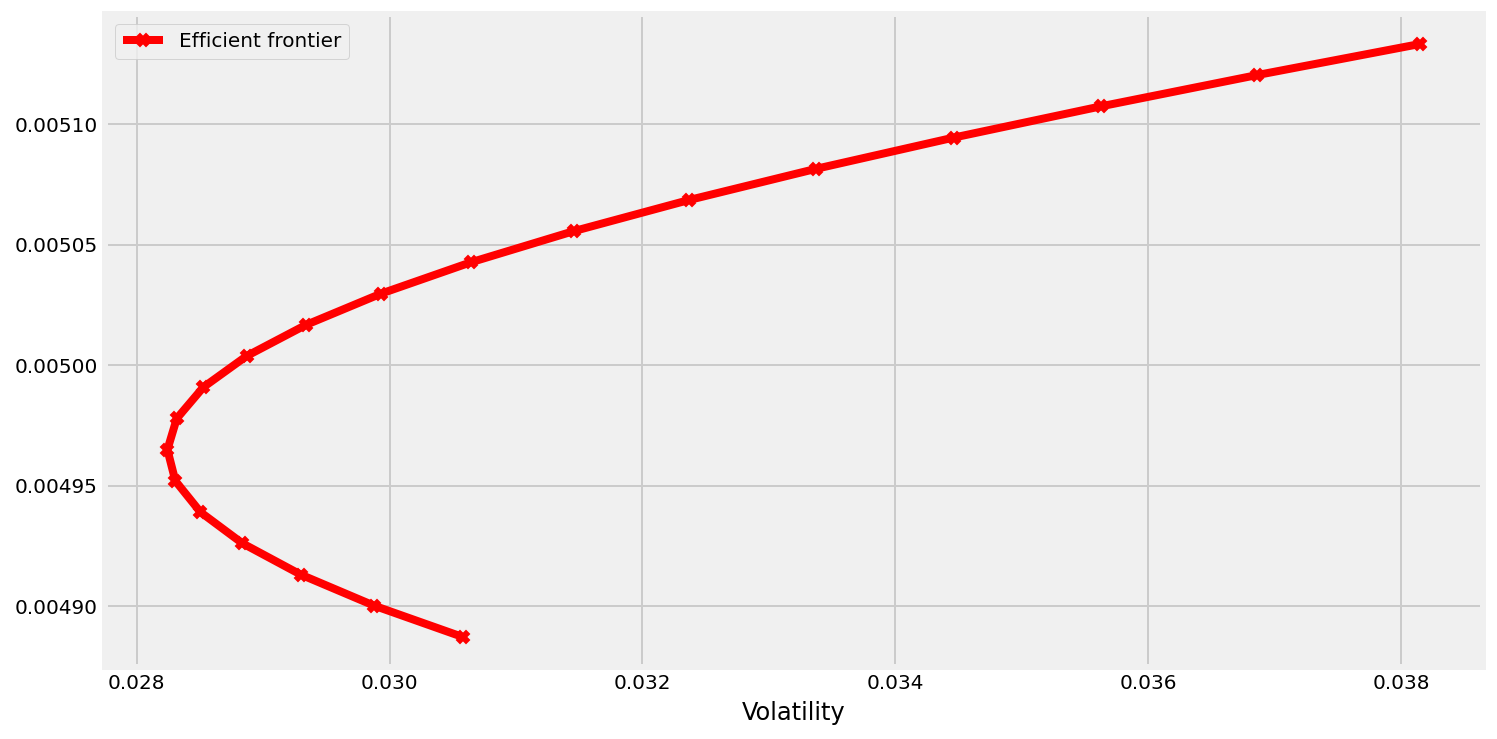

In [92]:
l = ["MSFT", "AAPL"]
efficient_frontier(20, data_train_mean[l], data_train_cov_mat.loc[l,l])

      0     1     2     3     4     5     6     7     8     9   ...    11  \
0  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.000   
1  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.069   
2  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.150   
3  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.236   
4  0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000  ... 0.307   
5  0.000 0.000 0.000 0.000 0.000 0.000 0.006 0.000 0.000 0.000  ... 0.371   
6  0.000 0.000 0.000 0.000 0.000 0.000 0.049 0.000 0.000 0.000  ... 0.416   
7  0.000 0.000 0.000 0.000 0.000 0.000 0.077 0.000 0.000 0.000  ... 0.436   
8  0.000 0.000 0.000 0.000 0.000 0.000 0.077 0.000 0.000 0.000  ... 0.410   
9  0.000 0.000 0.000 0.000 0.000 0.000 0.073 0.000 0.000 0.000  ... 0.410   
10 0.011 0.000 0.000 0.000 0.000 0.000 0.067 0.000 0.000 0.000  ... 0.398   
11 0.030 0.000 0.000 0.000 0.000 0.000 0.064 0.000 0.000 0.000  ... 0.374   

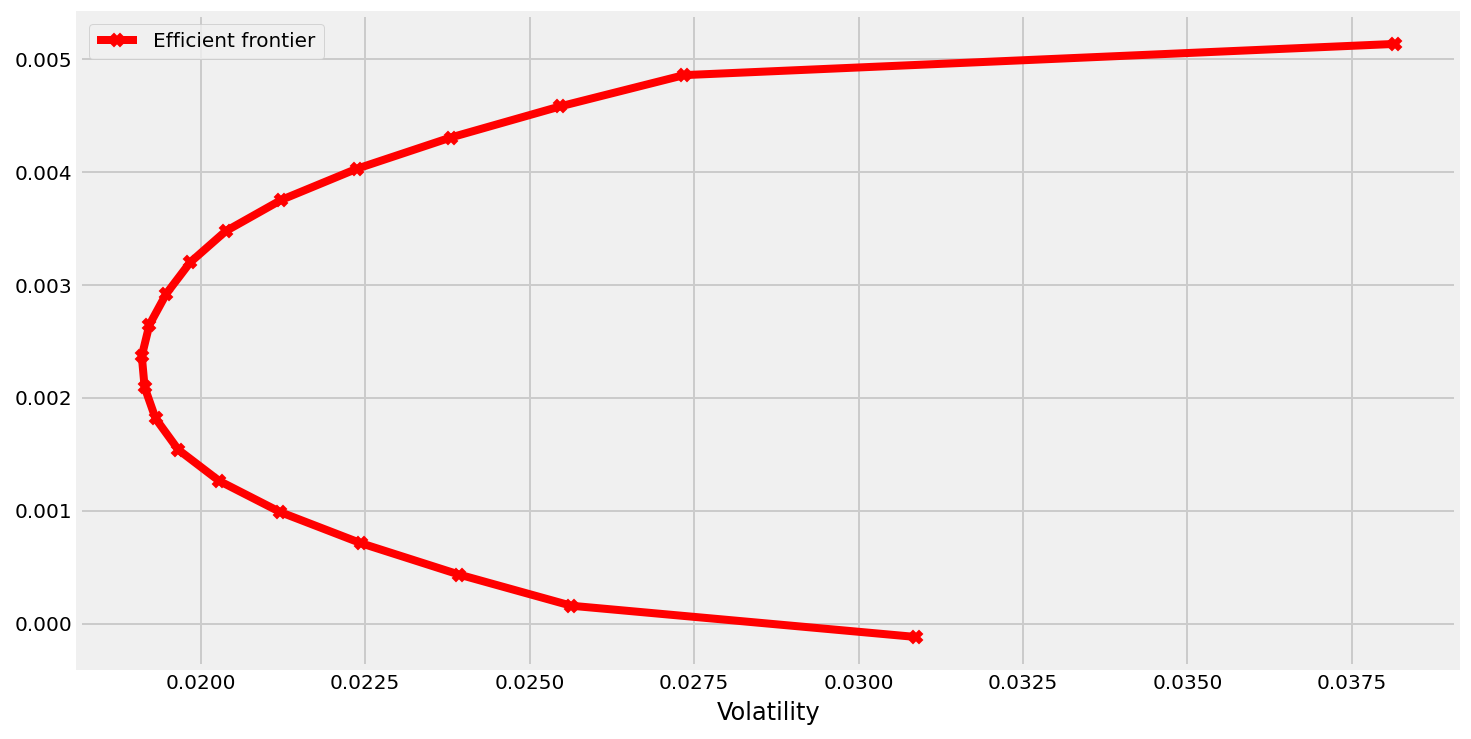

In [93]:
l = ["FRC", "PNC", "USB", "JPM", "BAC", "C", "RY", "WFC", "GS", "MS", "HSBC",
       "JNJ", "PFE", "MRK", "XOM", "RDS", "CVS", "BP", "AAPL", "GOOG", "MSFT"]
efficient_frontier(20, data_train_mean[l], data_train_cov_mat.loc[l,l])

### PLOT EFFICIENT FRONTIER,GMV, KELLY, RISK PARITY, 1/N 

In [141]:
x0 = uniform(-1, 1, n_assets)
x0 /= np.sum(np.abs(x0))

def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x)) - 1}

def min_vol_target(mean_ret, cov, target, short=True):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq', 'fun': lambda x: ret_(x) - target},
                   weight_constraint]
    
    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 1e4})

def min_vol(mean_ret, cov, short=True):
    
    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 1e4})

def efficient_frontier_1(mean_ret, cov, ret_range, short=True):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]


In [142]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=True)

In [143]:
print(simul_perf.describe())

       Annualized Standard Deviation  Annualized Returns
count                     100000.000          100000.000
mean                           0.189               0.004
std                            0.056               0.092
min                            0.044              -0.207
25%                            0.147              -0.066
50%                            0.190              -0.000
75%                            0.229               0.070
max                            0.320               0.259


In [144]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)
min_vol_perf

(0.10869470815461413, 0.1281078872399902)

In [145]:
ret_range = np.linspace(0, simul_perf.iloc[:, 1].max() * 1.1, 25)
eff_pf = efficient_frontier_1(mean_returns, cov_matrix, ret_range,short=False)

In [146]:
#Risk parity- allocates weights to the assets based on the inverse of variances 
std = monthly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
r, sd

(0.09792260984317891, 0.18758964578387646)

In [147]:
#equal weight portfolios
r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
r,sd

(0.09810064837682031, 0.1778730483761271)

Kelly rule maximizes logarithmic wealth as a function of the odds of success of each game, and includes implicit bankruptcy protection since log(0) is negative infinity so that a Kelly gambler would naturally avoid losing everything.

In [148]:
#Kelly criterion- optimal share of capital to bet 
kelly_wt = precision_matrix.dot(mean_returns).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
kelly_wt,r, sd

(array([ 0.06406304, -0.00486804,  0.01114431,  0.14703412,  0.02165148,
        -0.09450039,  0.04040113, -0.04552053, -0.086943  ,  0.03060679,
        -0.06741524,  0.06005535, -0.00147603,  0.02760319, -0.07704359,
        -0.00272586, -0.02774504,  0.01414223,  0.06329492,  0.00793496,
         0.10383076]),
 0.07415578644597542,
 0.04054441740367649)

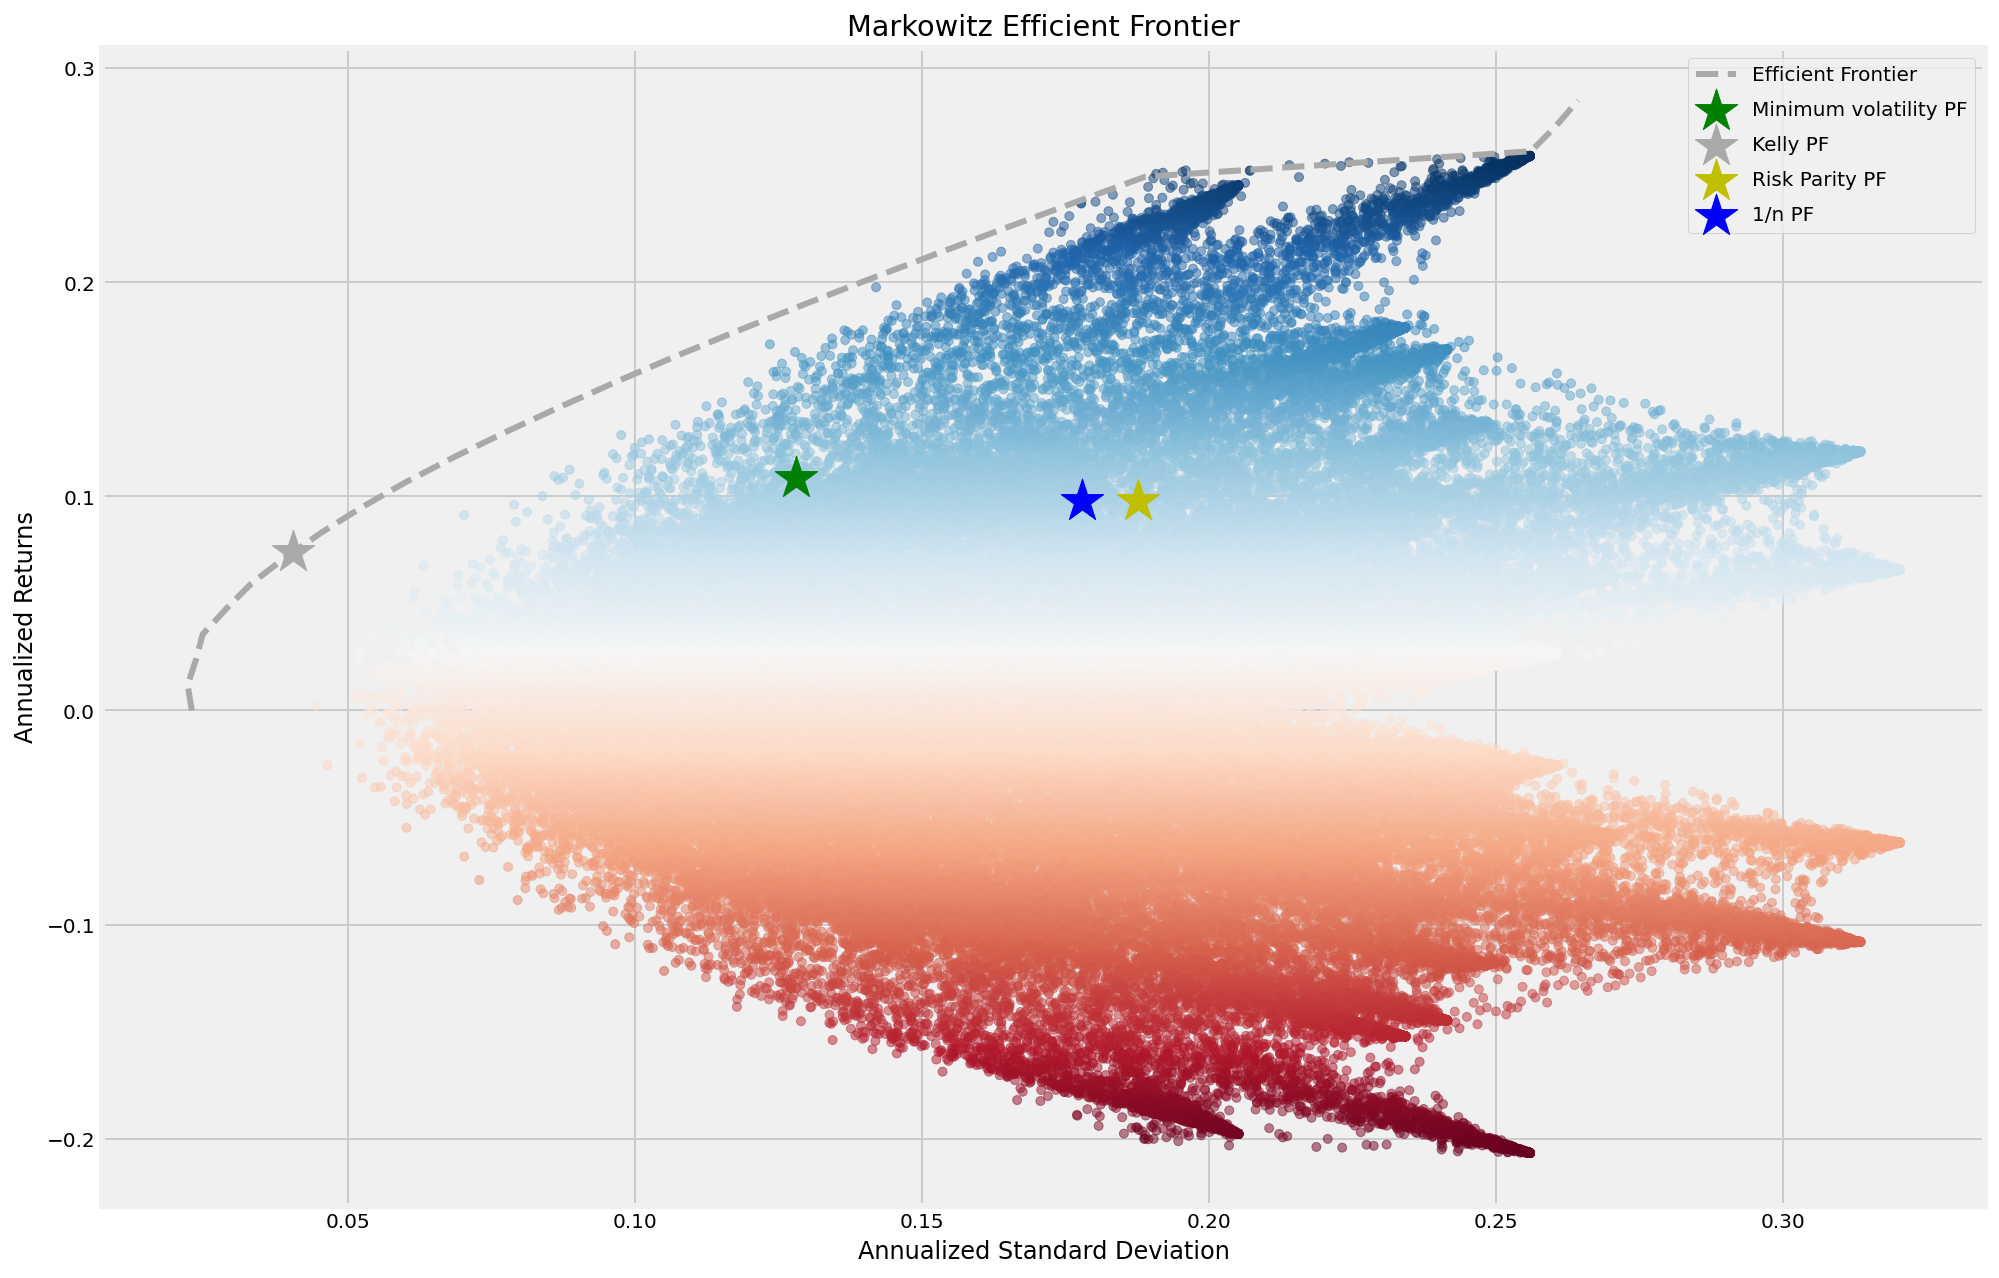

In [149]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=1, ax=ax,
                                 cmap='RdBu',
                                 alpha=0.5, figsize=(14, 9), colorbar=False,
                                 title='Markowitz Efficient Frontier')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='*', color='g', s=500, label='Minimum volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='*', color='darkgrey', s=500, label='Kelly PF')

std = monthly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='*', color='y', s=500, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='*', color='blue', s=500, label='1/n PF')

ax.plot([p['fun'] for p in eff_pf], ret_range, 
        linestyle='--', lw=3, color='darkgrey', label='Efficient Frontier')
ax.legend(labelspacing=0.8)
fig.tight_layout();